#### Objective
* Vetting each of the categorical and numerical columns for missing values and
outliers.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%%javascript 
//Disable autoscrolling to see entire graph
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

##### 1. Segregate the categorical attributes in a separate dataframe to analyze:
* Figure out the categorical columns from the data type.
* Find out the number of missing values in each column.
* Get the number of labels in each variable.


In [3]:
# Read Rain in Australia Dataset
df_weather = pd.read_pickle("df_weather_2.pkl")

In [4]:
df_weather.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'month', 'year', 'day'],
      dtype='object')

In [4]:
# Divide columns by numerical and categorical
numerical_columns = df_weather._get_numeric_data().columns
categorical_columns = list(set(df_weather.columns) - set(numerical_columns))

In [5]:
df_weather_categorical = df_weather[categorical_columns]

In [6]:
df_weather_categorical.shape

(142193, 4)

In [7]:
df_weather_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   WindDir9am   132180 non-null  object
 1   WindGustDir  132863 non-null  object
 2   Location     142193 non-null  object
 3   WindDir3pm   138415 non-null  object
dtypes: object(4)
memory usage: 4.3+ MB


In [8]:
# Determine number of missing values in each categorical variable
df_weather_categorical.isna().sum()

WindDir9am     10013
WindGustDir     9330
Location           0
WindDir3pm      3778
dtype: int64

In [9]:
# Display number of possible values in each column, left justify column name for easier reading
for column in categorical_columns:
    number_of_possible_values = len(df_weather[column].value_counts())    
    print(f"{column.ljust(12,' ')}: {number_of_possible_values:,}")

WindDir9am  : 16
WindGustDir : 16
Location    : 49
WindDir3pm  : 16


In [10]:
# Get frequency distribution and unique labels
df_weather['RainToday'].value_counts()

 0    109332
 1     31455
-1      1406
Name: RainToday, dtype: int64

RainToday has 1,406 missing elements as indicated by the -1

##### 2. Now, segregate the numerical attributes to analyze them separately:
* Figure out the numerical columns using the data type of the columns.
* Find out the number of missing values in each column.

In [11]:
# Dataframe with numerical variables
df_weather_numerical = df_weather[numerical_columns]

In [12]:
# Sample 5 rows of numerical variables
df_weather_numerical.sample(5)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,month,year,day
98270,5.4,13.1,3.8,1.8,1.9,52.0,17.0,20.0,95.0,90.0,...,1001.6,7.0,8.0,8.6,8.3,1,1,8,2012,16
115675,6.9,22.2,0.0,4.0,10.6,33.0,4.0,17.0,55.0,43.0,...,1018.2,3.0,6.0,18.2,20.9,0,0,10,2011,5
17662,9.8,19.0,0.0,NaN,NaN,NaN,28.0,NaN,69.0,NaN,...,NaN,0.0,NaN,12.5,NaN,0,0,5,2017,29
39249,17.2,23.2,19.4,15.0,NaN,NaN,15.0,22.0,80.0,72.0,...,1031.6,6.0,6.0,18.7,20.5,1,1,3,2010,13
134802,10.3,29.3,0.0,4.0,10.5,24.0,0.0,11.0,67.0,30.0,...,1015.7,0.0,0.0,18.2,28.8,0,0,5,2014,25


In [13]:
# Display data types for each variable
df_weather_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        141556 non-null  float64
 1   MaxTemp        141871 non-null  float64
 2   Rainfall       140787 non-null  float64
 3   Evaporation    81350 non-null   float64
 4   Sunshine       74377 non-null   float64
 5   WindGustSpeed  132923 non-null  float64
 6   WindSpeed9am   140845 non-null  float64
 7   WindSpeed3pm   139563 non-null  float64
 8   Humidity9am    140419 non-null  float64
 9   Humidity3pm    138583 non-null  float64
 10  Pressure9am    128179 non-null  float64
 11  Pressure3pm    128212 non-null  float64
 12  Cloud9am       88536 non-null   float64
 13  Cloud3pm       85099 non-null   float64
 14  Temp9am        141289 non-null  float64
 15  Temp3pm        139467 non-null  float64
 16  RainToday      142193 non-null  int8   
 17  RainTomorrow   142193 non-nul

In [14]:
# Determine number of missing values in each numerical variables
df_weather_numerical.isna().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday            0
RainTomorrow         0
month                0
year                 0
day                  0
dtype: int64

##### 3. Identify the potential columns for outliers:
* Look at the summary statistics to figure out the potential columns for
outliers.
* Visualize the data points for the shortlisted columns using box plots.

In [15]:
# Get frequency distribution and unique labels, Transpose for easier reading
df_weather_numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,141556.0,12.186400,6.403283,-8.5,7.6,12.0,16.8,33.9
MaxTemp,141871.0,23.226784,7.117618,-4.8,17.9,22.6,28.2,48.1
Rainfall,140787.0,2.349974,8.465173,0.0,0.0,0.0,0.8,371.0
Evaporation,81350.0,5.469824,4.188537,0.0,2.6,4.8,7.4,145.0
Sunshine,74377.0,7.624853,3.781525,0.0,4.9,8.5,10.6,14.5
WindGustSpeed,132923.0,39.984292,13.588801,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,140845.0,14.001988,8.893337,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,139563.0,18.637576,8.803345,0.0,13.0,19.0,24.0,87.0
Humidity9am,140419.0,68.843810,19.051293,0.0,57.0,70.0,83.0,100.0
Humidity3pm,138583.0,51.482606,20.797772,0.0,37.0,52.0,66.0,100.0


At first glance, Rainfall has a max of 371 with a 75% of 0.80. Sunshine has a max of 135 with a 75% of 48.
WindGustSpeed has a max of 135 with a 75% percentile of 48. Similarly WindSpeed9am has a percentile of 75% go 19 but a max of 130. These are potential outliers

<AxesSubplot:>

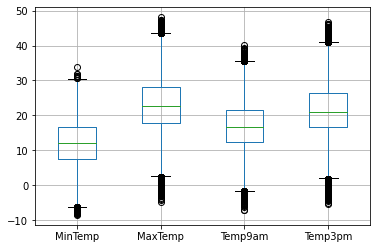

In [16]:
# Temperature boxplots
df_weather_numerical[['MinTemp','MaxTemp','Temp9am','Temp3pm']].boxplot()

<AxesSubplot:>

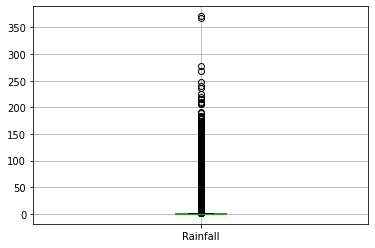

In [17]:
# Rainfall boxplots
df_weather_numerical[['Rainfall']].boxplot()

<AxesSubplot:>

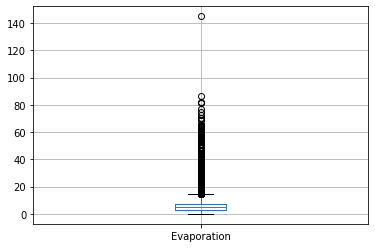

In [18]:
# Evaporation boxplots
df_weather_numerical[['Evaporation']].boxplot()

<AxesSubplot:>

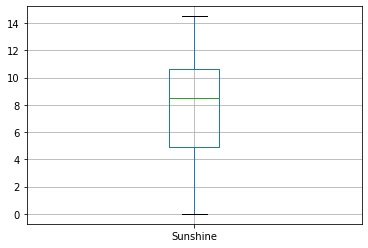

In [19]:
# Sunshine boxplots
df_weather_numerical[['Sunshine']].boxplot()

<AxesSubplot:>

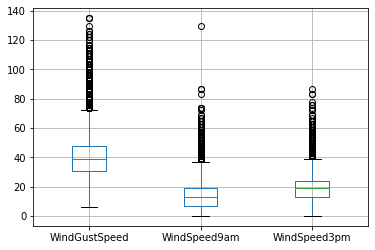

In [20]:
# Sunshine boxplots
df_weather_numerical[['WindGustSpeed','WindSpeed9am','WindSpeed3pm']].boxplot()

<AxesSubplot:>

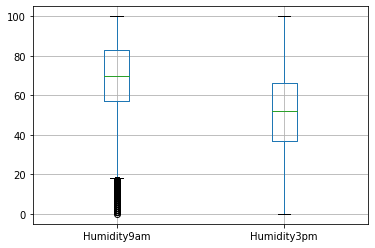

In [21]:
# Humidity boxplots
df_weather_numerical[['Humidity9am','Humidity3pm']].boxplot()

<AxesSubplot:>

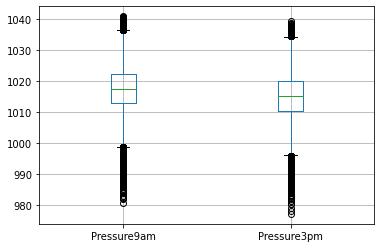

In [22]:
# Presure boxplots
df_weather_numerical[['Pressure9am','Pressure3pm']].boxplot()

<AxesSubplot:>

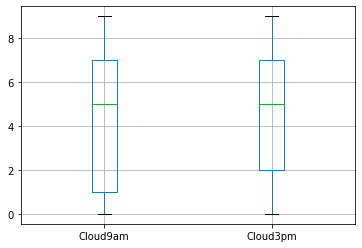

In [23]:
# Presure boxplots
df_weather_numerical[['Cloud9am','Cloud3pm']].boxplot()

**Based on these boxplots, it looks like these variables have outliers:**

* Rainfall
* Evaporation
* WindGustSpeed
* WindSpeed9am
* WindSpeed3pm

##### 4. Calculate the IQR(Interquartile Range) for the shortlisted columns:
* Print the lower bound and upper bound for each of the columns.

In [24]:
df_weather_numerical['Rainfall'].describe().T

count    140787.000000
mean          2.349974
std           8.465173
min           0.000000
25%           0.000000
50%           0.000000
75%           0.800000
max         371.000000
Name: Rainfall, dtype: float64

In [25]:
# Calculate Rainfall IQR
column = 'Rainfall'
quantile_25 = df_weather[column].quantile(.25)
quantile_75 = df_weather[column].quantile(.75)
iqr = quantile_75 - quantile_25
print(f" {column} IQR: {iqr}")
print(f" {column} 25% quantile: {quantile_25}")
print(f" {column} 75% quantile: {quantile_75}")

 Rainfall IQR: 0.8
 Rainfall 25% quantile: 0.0
 Rainfall 75% quantile: 0.8


In [26]:
# Calculate Evaporation IQR
column = 'Evaporation'
quantile_25 = df_weather[column].quantile(.25)
quantile_75 = df_weather[column].quantile(.75)
iqr = quantile_75 - quantile_25
print(f" {column} IQR: {iqr}")
print(f" {column} 25% quantile: {quantile_25}")
print(f" {column} 75% quantile: {quantile_75}")

 Evaporation IQR: 4.800000000000001
 Evaporation 25% quantile: 2.6
 Evaporation 75% quantile: 7.4


In [27]:
# Calculate WindGustSpeed IQR
column = 'WindGustSpeed'
quantile_25 = df_weather[column].quantile(.25)
quantile_75 = df_weather[column].quantile(.75)
iqr = quantile_75 - quantile_25
print(f" {column} IQR: {iqr}")
print(f" {column} 25% quantile: {quantile_25}")
print(f" {column} 75% quantile: {quantile_75}")

 WindGustSpeed IQR: 17.0
 WindGustSpeed 25% quantile: 31.0
 WindGustSpeed 75% quantile: 48.0


In [28]:
# Calculate WindSpeed9am IQR
column = 'WindSpeed9am'
quantile_25 = df_weather[column].quantile(.25)
quantile_75 = df_weather[column].quantile(.75)
iqr = quantile_75 - quantile_25
print(f" {column} IQR: {iqr}")
print(f" {column} 25% quantile: {quantile_25}")
print(f" {column} 75% quantile: {quantile_75}")

 WindSpeed9am IQR: 12.0
 WindSpeed9am 25% quantile: 7.0
 WindSpeed9am 75% quantile: 19.0


In [29]:
# Calculate WindSpeed3pm IQR
column = 'WindSpeed3pm'
quantile_25 = df_weather[column].quantile(.25)
quantile_75 = df_weather[column].quantile(.75)
iqr = quantile_75 - quantile_25
print(f" {column} IQR: {iqr}")
print(f" {column} 25% quantile: {quantile_25}")
print(f" {column} 75% quantile: {quantile_75}")

 WindSpeed3pm IQR: 11.0
 WindSpeed3pm 25% quantile: 13.0
 WindSpeed3pm 75% quantile: 24.0
